In [1]:
import pandas as pd
import networkx as nx
from collections import defaultdict, Counter
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib
from functions import*

from itertools import chain, product

In [2]:
academic     = pd.read_csv("academic.tsv",sep='\t')
advises      = pd.read_csv("advises.tsv",sep='\t')
degree_grant = pd.read_csv("degree_grant.tsv",sep='\t')
school       = pd.read_csv("school.tsv", sep='\t')
country      = pd.read_csv("country.tsv", sep='\t')
country2CN = pd.Series(country.country_name.values,index=country.country_id).to_dict()

degree1 = pd.read_csv("new_degree.tsv", sep='\t',keep_default_na=True)
degree = degree1.dropna(subset=["year"])

## Gives Full Name
full_name = academic.given_name + " " + academic.family_name
fam_name_D = pd.Series(academic.family_name.values,index=academic.academic_id).to_dict()
given_name_D = pd.Series(academic.given_name.values,index=academic.academic_id).to_dict()
academic["Full_Name"] = full_name
Fullname2ID = pd.Series(academic.academic_id.values, index=academic.Full_Name).to_dict()
full_name_D = pd.Series(full_name.values,index=academic.academic_id).to_dict()

academic2degree = pd.Series(degree1.degree_id.values,index=degree1.academic).to_dict()
degree2school   = pd.Series(degree_grant.school.values,index=degree_grant.degree).to_dict()
school2country  = pd.Series(school.country.values,index=school.school_id).to_dict()
school2SchName  = pd.Series(school.school_name.values,index=school.school_id).to_dict()

In [3]:
def ID2FN(x):
    return academic[academic.academic_id == x].Full_Name.values[0]

In [5]:
adj_list = list(zip(advises["advisor"], advises["advisee"]))
G = nx.DiGraph()
G.add_edges_from(adj_list)
G = G.reverse()

nx.set_node_attributes(G, full_name_D, 'full_name')
G_undirect = G.to_undirected()
medalists     = pd.read_csv("new_medalists.csv",sep=',')
medalist_IDs = []

for i in medalists.Winner.values:
    ID = Fullname2ID[i]
    if i == "Paul Cohen":
        ID = 6479
    if i == "Michael Freedman":
        ID = 1365
    if i == "Alan Baker":
        ID = 22765
    
    if ID == 230591:
        ID = 93772
    if ID == 245820:
        ID = 15779
    if ID == 211588:
        ID = 6488
    G.nodes()[ID]["medalist"] = 1
    medalist_IDs.append(ID)

In [6]:
forest = []
for m in medalist_IDs:
    tree  = [m]
    queue = [m]
    while queue != []:
        i = queue[0]
        if list(G.neighbors(i)) == []:
            break
        a = list(G.neighbors(i))[0]
        tree.append(a)
        queue.pop(0)
        queue.append(a)
    forest.append(tree)
    
forest1 = list(chain(*forest))
forest2 = np.unique(forest1)
F = G.subgraph(forest2)
M = G.subgraph(medalist_IDs)
F_U = F.to_undirected()
COMPS = list(nx.connected_components(F_U))

Marin Mersenne
3
Moses Perez
4
Ernst Schering
5
Walter Ball
6
Pietro Paoli
7


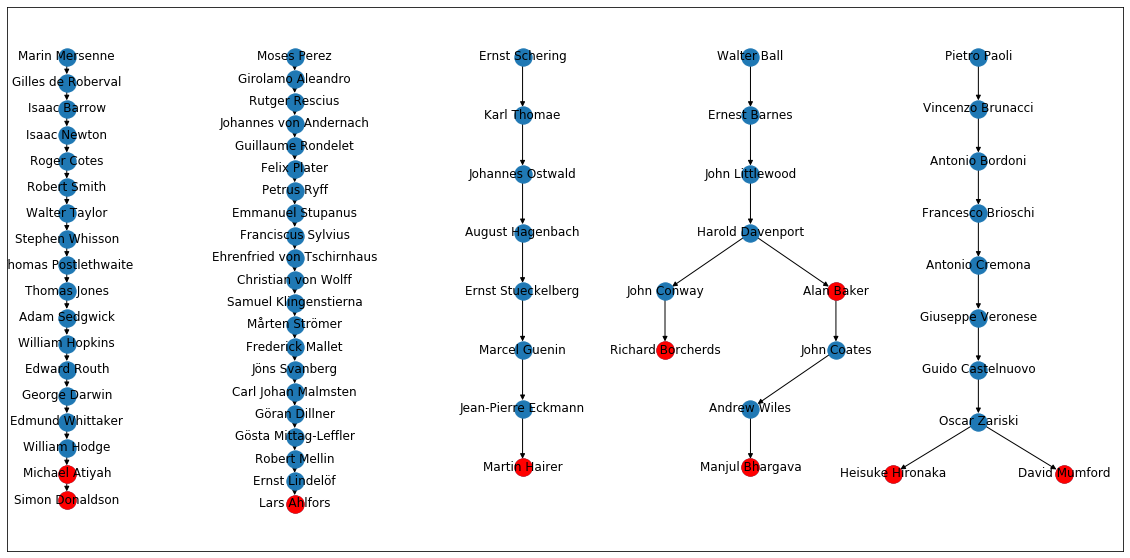

In [16]:
plt.figure(figsize=(20,10))
for i in range(len(COMPS)):
    if i >= 3 and i <8:
        B = COMPS[i]
        B = G.subgraph(B)
        B_R = B.reverse()
        root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]
        print(ID2FN(root))
        pos = hierarchy_pos(B_R, root)
        center = (1/5)*(i-2) - 0.5    
        pos = {k: (pos[k] - 0.7*(pos[k] - np.array([0.5,0])) + np.array([ center , 0 ])) for k in pos.keys()}
        M_B = B_R.subgraph(medalist_IDs)
        nx.draw_networkx_nodes(B_R,pos)
        nx.draw_networkx_nodes(M_B,pos,node_color="r")
        nx.draw_networkx_edges(B_R,pos)
        nx.draw_networkx_labels(B_R,pos,{k:ID2FN(k) for k in B.nodes()})
    else:
        continue

[143130]
['Ignatz Mühlwenzel']


{80901: Text(0.5, -0.846153846153846, 'David Gross'),
 24210: Text(0.625, -0.5384615384615385, 'Angelo Battelli'),
 6424: Text(0.875, -0.6923076923076923, 'Shiing-Shen Chern'),
 143129: Text(0.875, -0.07692307692307693, 'Joseph Stepling'),
 143130: Text(0.875, 0.0, 'Ignatz Mühlwenzel'),
 18601: Text(0.875, -0.6153846153846154, 'Wilhelm Blaschke'),
 18602: Text(0.875, -0.5384615384615385, 'Wilhelm Wirtinger'),
 128056: Text(0.5, -0.12307692307692308, 'Ignaz Lindner'),
 27259: Text(0.875, -0.46153846153846156, 'Gustav Ritter von Escherich'),
 31293: Text(0.5, -0.9230769230769229, 'Edward Witten'),
 16966: Text(0.625, -0.6153846153846154, 'Luigi Puccianti'),
 96327: Text(0.75, -0.23076923076923078, 'Franz Ritter von Gerstner'),
 18758: Text(0.8333333333333333, -0.7692307692307692, 'Shing-Tung Yau'),
 114765: Text(0.625, -0.38461538461538464, 'Francesco Rossetti'),
 14167: Text(0.625, -0.6923076923076923, 'Enrico Fermi'),
 141273: Text(0.5, 0.2, 'Nikolaus Poda von Neuhaus'),
 96350: Text(0

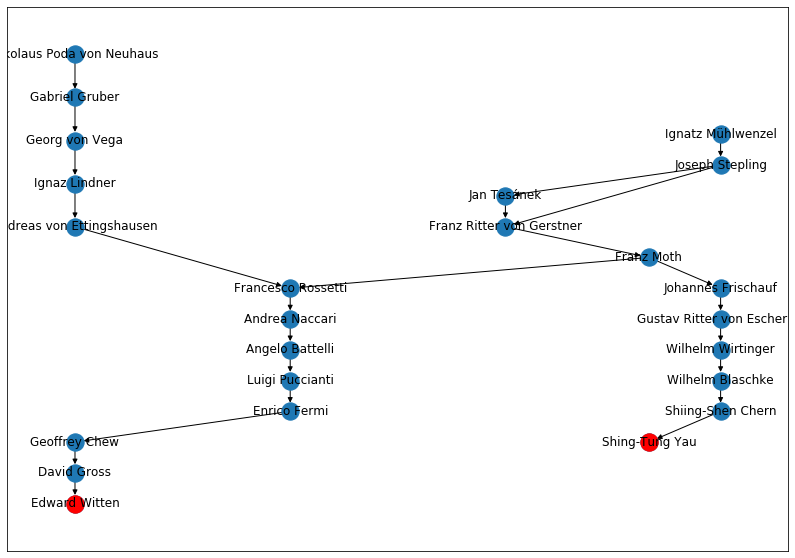

In [12]:
plt.figure(figsize=(14,10))
i = 2

remove_list = [141273,140923,140909,128056,113010]
B_prime = [k for k in COMPS[i] if k not in remove_list]

B = G.subgraph(B_prime)
B_R = B.reverse()
print([k for k in B_R.nodes() if B_R.in_degree(k) == 0])
print([ID2FN(k) for k in B_R.nodes() if B_R.in_degree(k) == 0])
root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]

pos = hierarchy_pos(B_R, root)
pos = {k: np.array(pos[k]) for k in pos.keys()}

pos[143130][0] = pos[27258][0]
pos[143129][0] = pos[27258][0]
pos[80901][0] = pos[29301][0]

Ys = np.linspace(0.2,  pos[96327][1],5)
coords = list(product([pos[29301][0]], Ys))
pos2 = dict(zip(remove_list,coords))
pos.update(pos2)

B = G.subgraph(COMPS[i])
B_R = B.reverse()

M_B = B_R.subgraph(medalist_IDs)

nx.draw_networkx_nodes(B_R,pos)
nx.draw_networkx_nodes(M_B,pos,node_color="r")

nx.draw_networkx_edges(B_R,pos)
nx.draw_networkx_labels(B_R,pos,{k:ID2FN(k) for k in B_R.nodes()})

[12540]
['Joseph von Littrow']


{11776: Text(0.41666666666666663, -0.7272727272727274, 'Nikolai Makarov'),
 84354: Text(0.75, -0.7272727272727274, 'Grigorii Perelman'),
 11779: Text(0.5, -0.8181818181818183, 'Stanislav Smirnov'),
 98185: Text(0.75, -0.9090909090909093, 'Caucher Birkar'),
 24594: Text(0.5, -0.5454545454545455, 'Igor Shafarevich'),
 84371: Text(0.7857142857142856, -0.6363636363636365, 'Yuri Burago'),
 20646: Text(0.5833333333333334, -0.7272727272727274, 'Vladimir Drinfeld'),
 31015: Text(0.25, -0.2727272727272727, 'Aleksandr Lyapunov'),
 74408: Text(0.75, -0.4545454545454546, 'Boris Delone'),
 58665: Text(0.1, -0.5454545454545455, 'Leonid Kantorovich'),
 30638: Text(0.7000000000000001, -0.5454545454545455, 'Aleksandr Alexandrov'),
 44207: Text(0.5, -0.6363636363636365, 'Yuri Manin'),
 55611: Text(0.75, -0.2727272727272727, 'Alexander Korkin'),
 55623: Text(0.25, -0.36363636363636365, 'Vladimir Steklov'),
 16967: Text(0.9166666666666666, -0.7272727272727274, 'Sergei Vostokov'),
 81617: Text(0.8333333333

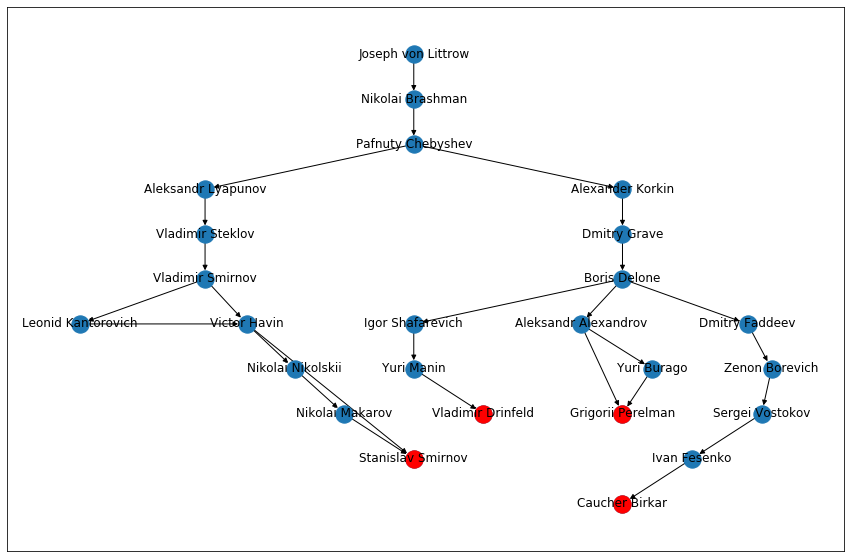

In [13]:
plt.figure(figsize=(15,10))
i = 0

B = G.subgraph(COMPS[i])
B_R = B.reverse()
root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]

pos = hierarchy_pos(B_R, root)
pos = {k: np.array(pos[k]) for k in pos.keys()}

M_B = B_R.subgraph(medalist_IDs)

nx.draw_networkx_nodes(B_R,pos)
nx.draw_networkx_nodes(M_B,pos,node_color="r")

nx.draw_networkx_edges(B_R,pos)
nx.draw_networkx_labels(B_R,pos,{k:ID2FN(k) for k in B_R.nodes()})

In [56]:
%%time
SEEDS = [195203, 108266, 141571, 143630]
B = G.subgraph(COMPS[1])
forest = []
nodes = set(B.nodes())
G_R = G.reverse()
for seed in SEEDS:
    queue = [seed]
    tree = [seed]
    while queue != []:
        new_queue = []
        for q in queue:
            neighs = G_R.neighbors(q)
            neighs = set(neighs) & nodes
            new_queue += list(neighs)
        tree += new_queue
        queue = new_queue
    forest.append(tree)

Wall time: 2.36 s


[195203]
['Giuseppe Doveri']
[108266]
["Jean d'Alembert"]
[141571]
['Thomas Cranmer']
[143630]
['Friedrich Leibniz']


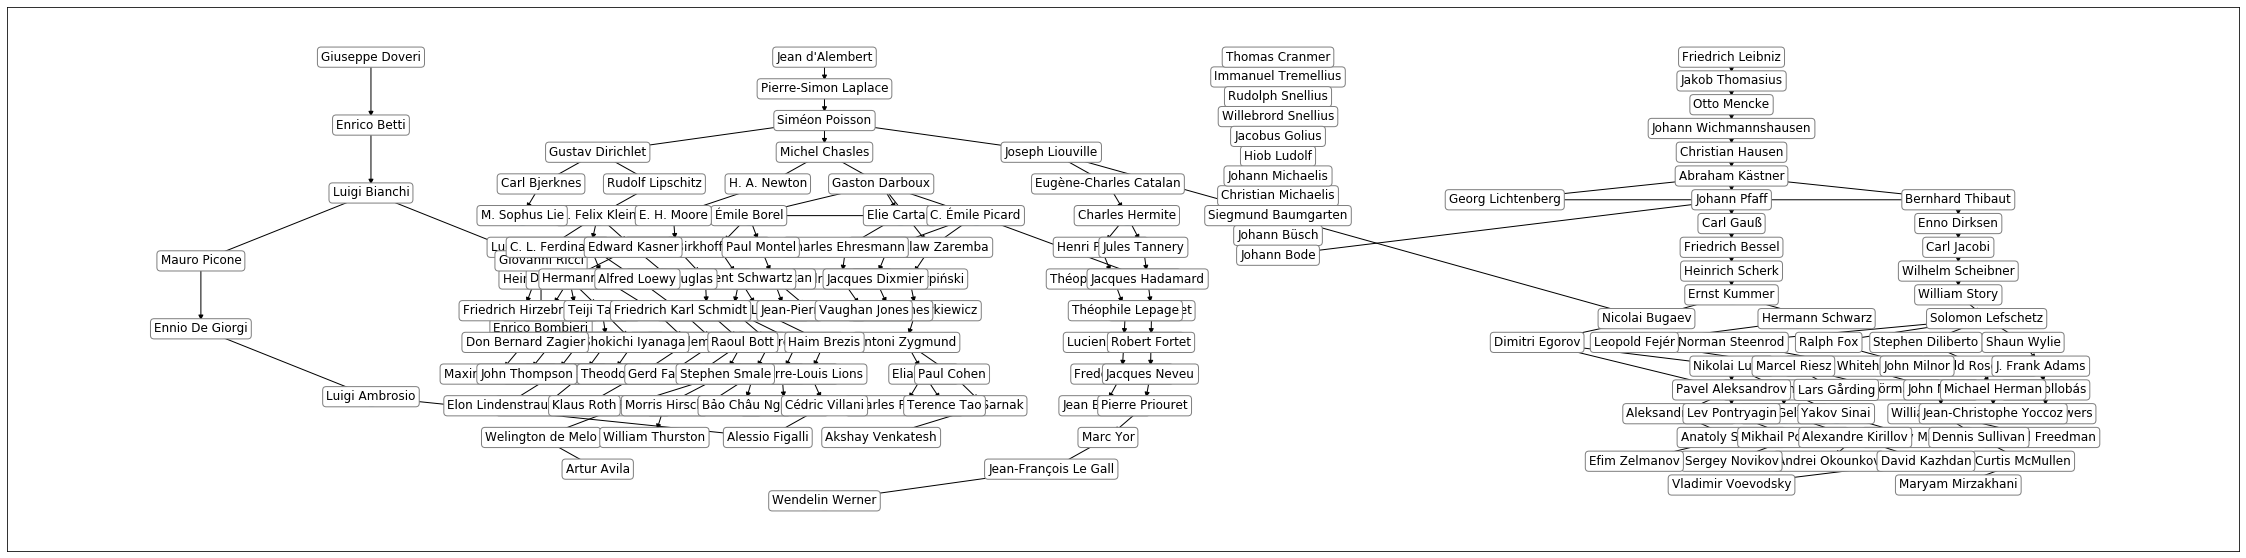

In [43]:
plt.figure(figsize=(40,10))
all_pos = {}
for i,s in enumerate(SEEDS):  
    B = G.subgraph(forest[i])
    
    B_R = B.reverse()
    print([k for k in B_R.nodes() if B_R.in_degree(k) == 0])
    print([ID2FN(k) for k in B_R.nodes() if B_R.in_degree(k) == 0])
    root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]
    pos = hierarchy_pos(B_R, root)
    center = (1/5)*(i-2) - 0.5    
    pos = {k: (pos[k] - 0.7*(pos[k] - np.array([0.5,0])) + np.array([ center , 0 ])) for k in pos.keys()}
    all_pos.update(pos)
    
B = G.subgraph(COMPS[1])
B_R = B.reverse()
M_B = B_R.subgraph(medalist_IDs)

bbox = dict(boxstyle='round',
                    ec=(.5, .5, .5),
                    fc=(1.0, 1.0, 1.0),
                    )

nx.draw_networkx_nodes(B_R,all_pos)
nx.draw_networkx_nodes(M_B,all_pos,node_color="r")

nx.draw_networkx_edges(B_R,all_pos)
# nx.draw_networkx_labels(B_R,pos)
nx.draw_networkx_labels(B_R,all_pos,{k:ID2FN(k) for k in B_R.nodes()}, bbox=bbox)

plt.savefig("families/final-4-names.png")

[195203]
['Giuseppe Doveri']
[108266]
["Jean d'Alembert"]
[141571]
['Thomas Cranmer']
[143630]
['Friedrich Leibniz']


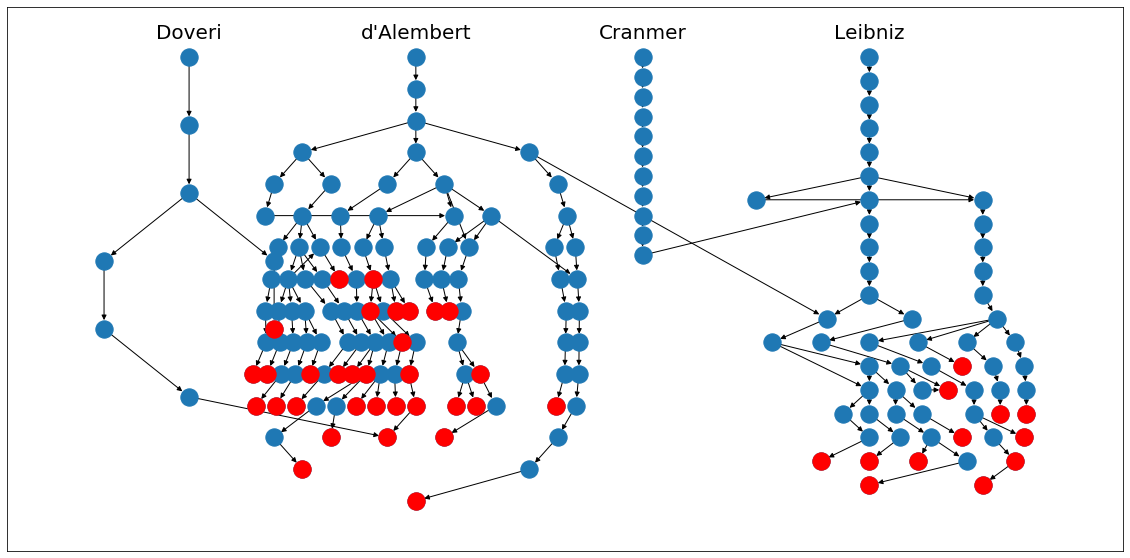

In [71]:
plt.figure(figsize=(20,10))
all_pos = {}
for i,s in enumerate(SEEDS):  
    B = G.subgraph(forest[i])
    
    B_R = B.reverse()
    print([k for k in B_R.nodes() if B_R.in_degree(k) == 0])
    print([ID2FN(k) for k in B_R.nodes() if B_R.in_degree(k) == 0])
    root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]
    pos = hierarchy_pos(B_R, root)
    center = (1/5)*(i-2) - 0.5    
    pos = {k: (pos[k] - 0.7*(pos[k] - np.array([0.5,0])) + np.array([ center , 0 ])) for k in pos.keys()}
    all_pos.update(pos)
    
B = G.subgraph(COMPS[1])
B_R = B.reverse()
M_B = B_R.subgraph(medalist_IDs)

bbox = dict(boxstyle='round',
                    ec=(.5, .5, .5),
                    fc=(1.0, 1.0, 1.0),
                    )

nx.draw_networkx_nodes(B_R,all_pos)
nx.draw_networkx_nodes(M_B,all_pos,node_color="r")

nx.draw_networkx_edges(B_R,all_pos)

labels = {k:ID2FN(k).split(" ")[-1] for k in B_R.nodes() if B_R.in_degree(k) == 0}
label_pos = {k:all_pos[k]+np.array([0,0.015]) for k in all_pos.keys()}
RT = B_R.subgraph(root)
nx.draw_networkx_labels(RT,label_pos,labels,font_size=20)

# nx.draw_networkx_labels(B_R,pos)
# nx.draw_networkx_labels(B_R,all_pos,{k:ID2FN(k) for k in B_R.nodes()}, bbox=bbox)
plt.savefig("families/joint-3.png")

# Joint Production

Marin Mersenne
3
Moses Perez
4
Ernst Schering
5
Walter Ball
6
Pietro Paoli
7


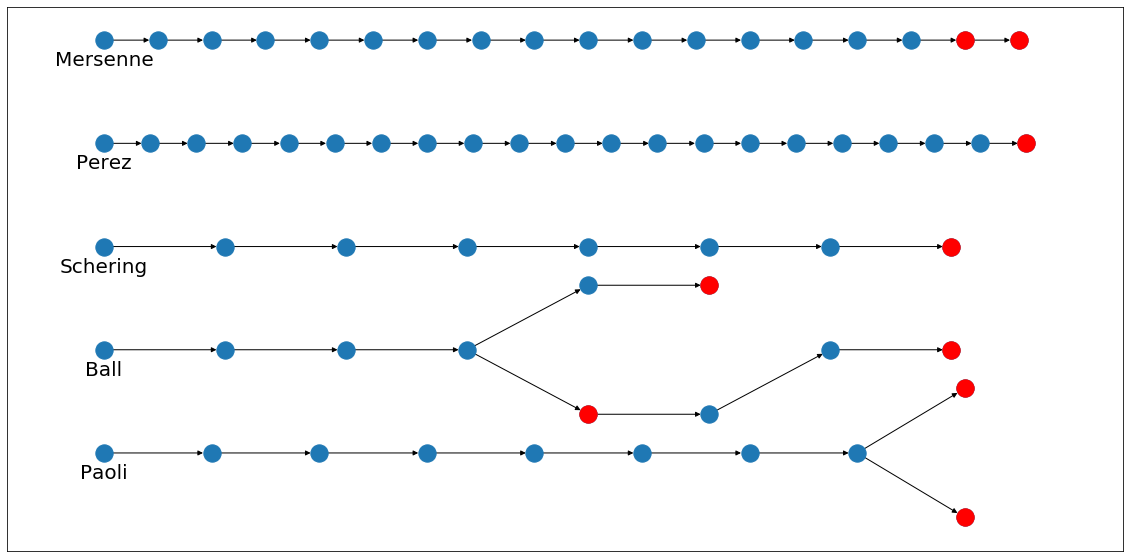

In [72]:
plt.figure(figsize=(20,10))


for i in range(len(COMPS)):
    if i >= 3 and i <8:
        B = COMPS[i]
        B = G.subgraph(B)
        
        B_R = B.reverse()
        root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]
        print(ID2FN(root))
        
        pos = hierarchy_pos(B_R, root)
        center = (1/5)*(i-2) - 0.5    
        pos = {k: (pos[k] - 0.7*(pos[k] - np.array([0.5,0])) + np.array([ center , 0 ])) for k in pos.keys()}
        pos = {k: (1-pos[k][1] , 1-pos[k][0]) for k in pos.keys()}
#         pos = nx.spring_layout(B_R)
        M_B = B_R.subgraph(medalist_IDs)
    
        nx.draw_networkx_nodes(B_R,pos)
        nx.draw_networkx_nodes(M_B,pos,node_color="r")
        
        nx.draw_networkx_edges(B_R,pos)
        
        labels = {k:ID2FN(k).split(" ")[-1] for k in B_R.nodes() if B_R.in_degree(k) == 0}
        label_pos = {k:pos[k]+np.array([0,-0.04]) for k in pos.keys()}
        RT = B_R.subgraph(root)
        nx.draw_networkx_labels(RT,label_pos,labels,font_size=20)
        
#         nx.draw_networkx_labels(B_R,pos,{k:ID2FN(k) for k in B.nodes()})
        print(i)
#         nx.draw_networkx_labels(B_R,pos)
    else:
#     plt.savefig("families/{}.png".format(i))
        continue
plt.savefig("families/joint-1.png")

[143130]
['Ignatz Mühlwenzel']
[12540]
['Joseph von Littrow']


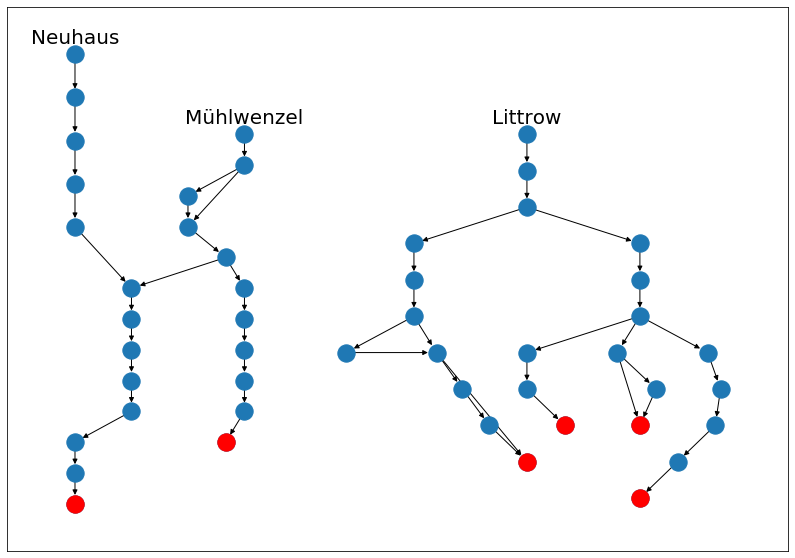

In [65]:
plt.figure(figsize=(14,10))

all_pos = {}

########### first one #########################################
i = 2

remove_list = [141273,140923,140909,128056,113010]
B_prime = [k for k in COMPS[i] if k not in remove_list]

B = G.subgraph(B_prime)
B_R = B.reverse()
print([k for k in B_R.nodes() if B_R.in_degree(k) == 0])
print([ID2FN(k) for k in B_R.nodes() if B_R.in_degree(k) == 0])
root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]

pos = hierarchy_pos(B_R, root)
pos = {k: np.array(pos[k]) for k in pos.keys()}

pos[143130][0] = pos[27258][0]
pos[143129][0] = pos[27258][0]
pos[80901][0] = pos[29301][0]

Ys = np.linspace(0.2,  pos[96327][1],5)
coords = list(product([pos[29301][0]], Ys))
pos2 = dict(zip(remove_list,coords))
pos.update(pos2)

pos = {k: pos[k] - np.array([0.5,0]) for k in pos.keys()}

all_pos.update(pos)
###############################################################

############ second one #######################################
i = 0
B = G.subgraph(COMPS[i])
B_R = B.reverse()
print([k for k in B_R.nodes() if B_R.in_degree(k) == 0])
print([ID2FN(k) for k in B_R.nodes() if B_R.in_degree(k) == 0])
root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]
pos = hierarchy_pos(B_R, root)
pos = {k: np.array(pos[k]) for k in pos.keys()}

pos = {k: pos[k] + np.array([0.5,0]) for k in pos.keys()}

all_pos.update(pos)
###############################################################


B = G.subgraph(list(COMPS[0]) + list(COMPS[2]) )
B_R = B.reverse()

M_B = B_R.subgraph(medalist_IDs)

nx.draw_networkx_nodes(B_R,all_pos)
nx.draw_networkx_nodes(M_B,all_pos,node_color="r")

nx.draw_networkx_edges(B_R,all_pos)
# nx.draw_networkx_labels(B_R,pos)
labels = {k:ID2FN(k).split(" ")[-1] for k in B_R.nodes() if B_R.in_degree(k) == 0}
label_pos = {k:all_pos[k]+np.array([0,0.04]) for k in all_pos.keys()}

RT = B_R.subgraph(labels.keys())
nx.draw_networkx_labels(RT,label_pos,labels,font_size=20)

plt.savefig("families/joint-2.png")

[195203]
['Giuseppe Doveri']
[108266]
["Jean d'Alembert"]
[141571]
['Thomas Cranmer']
[143630]
['Friedrich Leibniz']


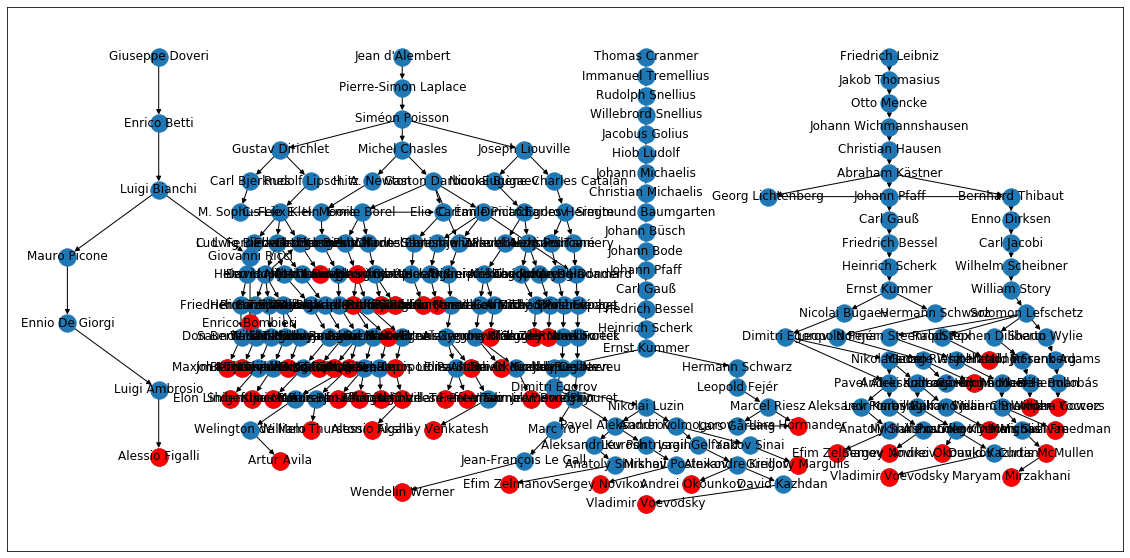

In [68]:
plt.figure(figsize=(20,10))
all_pos = {}
for i,s in enumerate(SEEDS):  
    B = G.subgraph(forest[i])
    B_R = B.reverse()
    print([k for k in B_R.nodes() if B_R.in_degree(k) == 0])
    print([ID2FN(k) for k in B_R.nodes() if B_R.in_degree(k) == 0])
    root = [k for k in B_R.nodes() if B_R.in_degree(k) == 0][0]

    pos = hierarchy_pos(B_R, root)
    center = (1/5)*(i-2) - 0.5    
    pos = {k: (pos[k] - 0.7*(pos[k] - np.array([0.5,0])) + np.array([ center , 0 ])) for k in pos.keys()}
    M_B = B_R.subgraph(medalist_IDs)
    nx.draw_networkx_nodes(B_R,pos)
    nx.draw_networkx_nodes(M_B,pos,node_color="r")

    nx.draw_networkx_edges(B_R,pos)
    # nx.draw_networkx_labels(B_R,pos)
    nx.draw_networkx_labels(B_R,pos,{k:ID2FN(k) for k in B_R.nodes()},font_size=20)
# plt.savefig("families/final-4.png")